In [1]:
%reload_kedro

2023-03-15 15:59:07,857 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /Users/guilhermepalazzo/Desktop/dev/git_repositories/crypto_msc_thesis
2023-03-15 15:59:08,840 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-03-15 15:59:09,226 - kedro.extras.extensions.ipython - INFO - ** Kedro project crypto_thesis
2023-03-15 15:59:09,234 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np

In [3]:
plt.style.use("grayscale")
warnings.filterwarnings("ignore")

## XGBoost

### Operations Profit over Time

In [4]:
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

2023-03-15 15:59:10,735 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [5]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

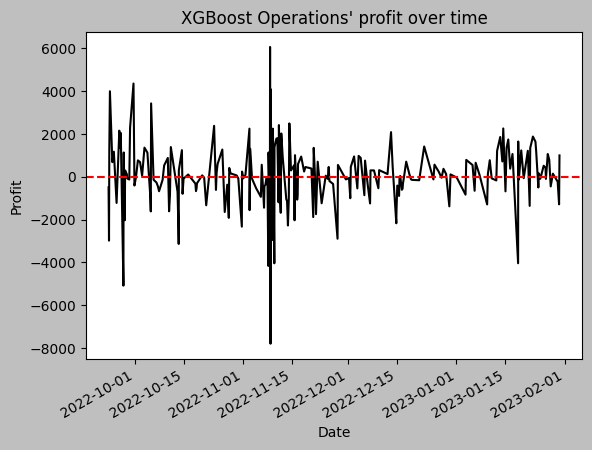

In [6]:
plot = df_ops[["close_time", "op_full_profit"]].set_index("close_time").sort_index(). \
                plot(title="XGBoost Operations' profit over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit"
                    )

plt.axhline(y=0.0, color='r', linestyle='--')

fig = plot.get_figure()
fig.savefig("/Users/guilhermepalazzo/Desktop/fig_xgboost_ops_profit.png")

<AxesSubplot: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

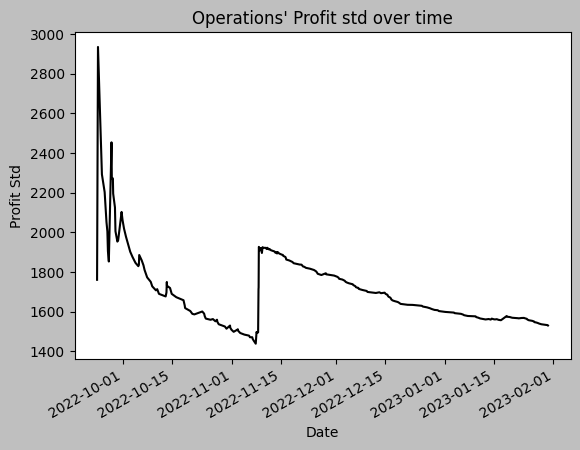

In [7]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<AxesSubplot: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

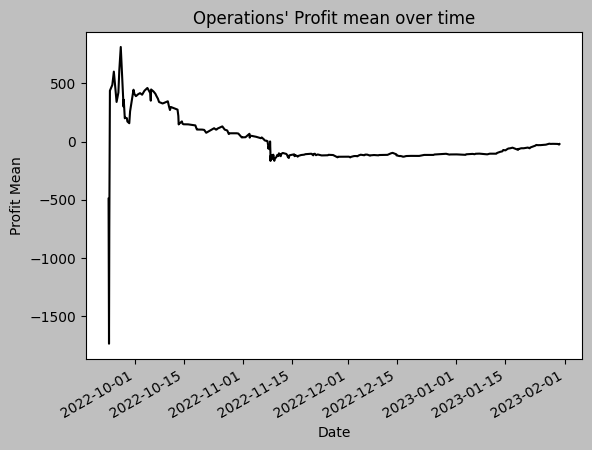

In [8]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LSTM

### Operations Profit over Time

In [9]:
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

2023-03-15 15:59:13,901 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [10]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

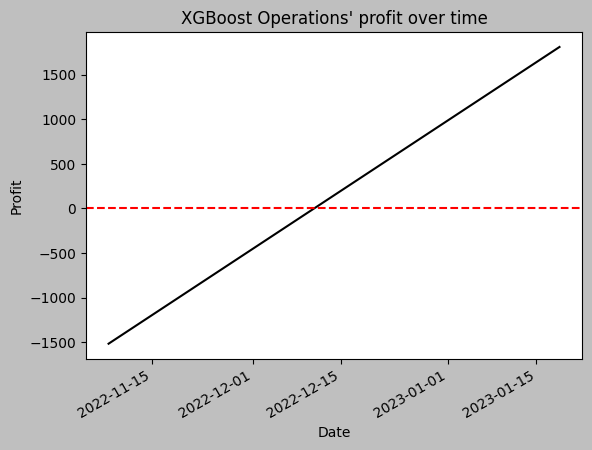

In [11]:
plot = df_ops[["close_time", "op_full_profit"]].set_index("close_time").sort_index(). \
                plot(title="LSTM Operations' profit over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit"
                    )

plt.axhline(y=0.0, color='r', linestyle='--')

fig = plot.get_figure()
fig.savefig("/Users/guilhermepalazzo/Desktop/fig_lstm_ops_profit.png")

<AxesSubplot: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

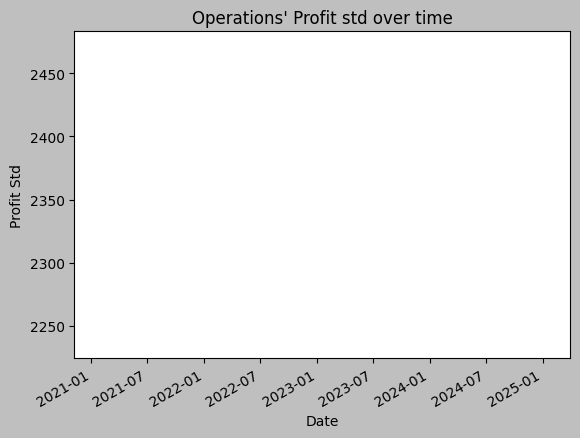

In [12]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<AxesSubplot: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

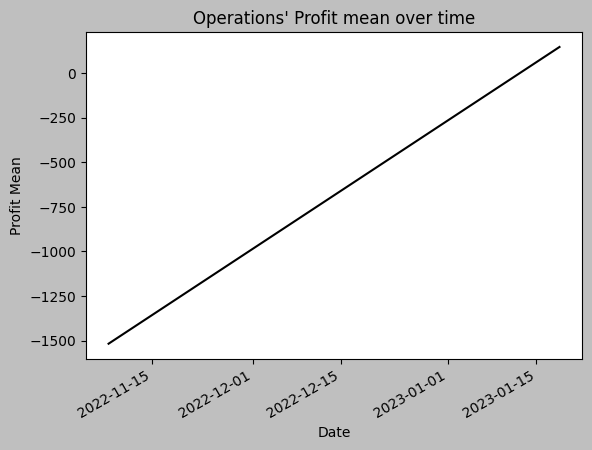

In [13]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LogReg

### Operations Profit over Time

In [14]:
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

2023-03-15 15:59:16,753 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [15]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

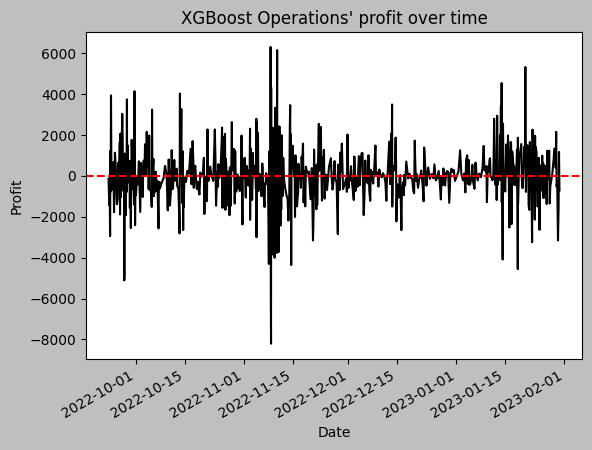

In [16]:
plot = df_ops[["close_time", "op_full_profit"]].set_index("close_time").sort_index(). \
                plot(title="LogReg Operations' profit over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit"
                    )

plt.axhline(y=0.0, color='r', linestyle='--')

fig = plot.get_figure()
fig.savefig("/Users/guilhermepalazzo/Desktop/fig_logreg_ops_profit.png")

<AxesSubplot: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

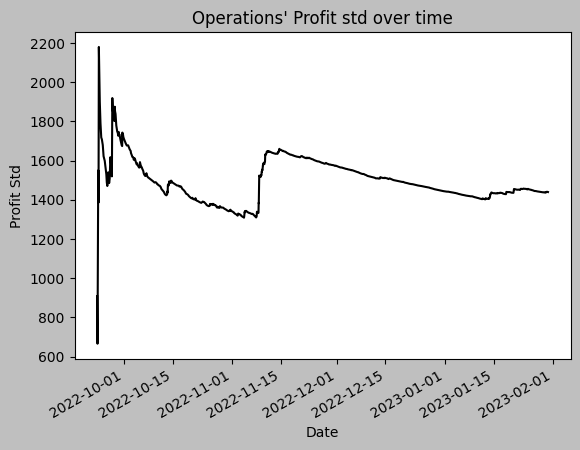

In [17]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<AxesSubplot: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

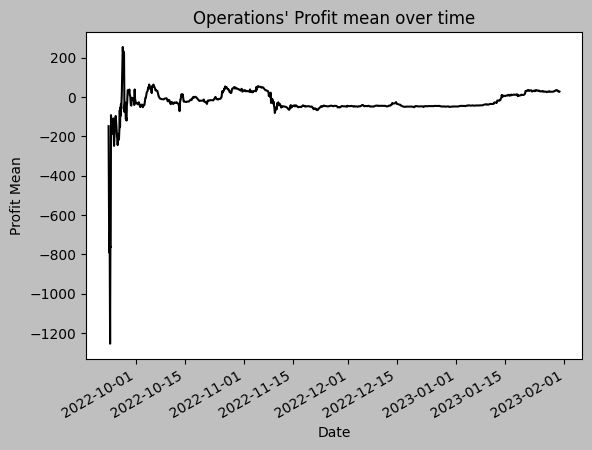

In [18]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

In [19]:
import quantstats as qs #import lib here otherwise it affects the design of the other plots

## XGBoost

### Portfolio overall metrics - Part 1

In [20]:
df_portf_metr = catalog.load("xgboost_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "xgboost"

df_benchm_metr = catalog.load("benchmark_xgboost_metrics")
df_benchm_metr.loc[:, "model"] = "benchmark"

2023-03-15 15:59:20,311 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_metrics` (ParquetDataSet)...
2023-03-15 15:59:20,332 - kedro.io.data_catalog - INFO - Loading data from `benchmark_xgboost_metrics` (ParquetDataSet)...


In [21]:
final_df = pd.concat([df_portf_metr, df_benchm_metr])
final_df = final_df.sort_values(by="nominal_profit", ascending=False)

final_df

,nominal_profit,consecutive_wins,consecutive_losses,model
0,22016.280000,10,5,benchmark
0,-4958.278313,5,7,xgboost


### Portfolio overall metrics - Part 2

In [22]:
# benchmark
df_benchmark_pnl = catalog.load("benchmark_xgboost_pnl")

df_benchmark_pnl.loc[:, "logret_pos"] = np.log(1 + df_benchmark_pnl["pctchg_pos"])
df_benchmark_pnl = df_benchmark_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_benchmark_pnl.loc[:, "logret_accum"] = df_benchmark_pnl["logret_pos"].cumsum()
df_benchmark_pnl.loc[:, "pctchg_accum"] = np.exp(df_benchmark_pnl["logret_accum"]) - 1

df_benchmark_pnl = df_benchmark_pnl[["pctchg_pos", "pctchg_accum"]].rename(columns={"pctchg_pos": "benchm_pctchg_pos",
                                                                           "pctchg_accum": "benchm_pctchg_accum"})

df_benchmark_pnl.index = pd.to_datetime(df_benchmark_pnl.index)

2023-03-15 15:59:20,496 - kedro.io.data_catalog - INFO - Loading data from `benchmark_xgboost_pnl` (ParquetDataSet)...


In [23]:
# xgboost
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "logret_pos"]]
df_logret.loc[:, "date"] = df_logret["close_time"].dt.date

df_logret_daily = df_logret.groupby("date")["logret_pos"].sum().reset_index().set_index("date").sort_index()

df_logret_daily.loc[:, "portf_logret_accum"] = df_logret_daily["logret_pos"].cumsum()

df_logret_daily.loc[:, "portf_pctchg_accum"] = np.exp(df_logret_daily["portf_logret_accum"]) - 1
df_logret_daily.loc[:, "portf_pctchg_pos"] = np.exp(df_logret_daily["logret_pos"]) - 1

df_pctchg_daily = df_logret_daily[["portf_pctchg_pos", "portf_pctchg_accum"]]

df_pctchg_daily.index = pd.to_datetime(df_pctchg_daily.index)

2023-03-15 15:59:20,581 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [24]:
# comparison
df_pctchg_daily_portf = pd.DataFrame(df_pctchg_daily, index=df_pctchg_daily.index)
df_pctchg_daily_benchm = pd.DataFrame(df_benchmark_pnl, index=df_benchmark_pnl.index)

df = df_pctchg_daily_portf.merge(df_pctchg_daily_benchm, left_index=True, right_index=True, how="left")

df.loc[:, "benchm_pctchg_pos"] = df["benchm_pctchg_pos"].fillna(0)
df.loc[:, "benchm_pctchg_accum"] = df["benchm_pctchg_accum"].ffill()
df.head(10)

,portf_pctchg_pos,portf_pctchg_accum,benchm_pctchg_pos,benchm_pctchg_accum
date,,,,
2022-09-23,0.011672,0.011672,0.024135,0.024135
2022-09-24,0.012226,0.024040,0.000000,0.024135
2022-09-25,-0.007952,0.015897,0.000000,0.024135
2022-09-26,0.043020,0.059601,-0.008963,0.014956
2022-09-27,-0.024608,0.033526,0.014489,0.029662
2022-09-28,-0.011284,0.021864,-0.003902,0.025644
2022-09-29,0.014139,0.036311,0.003755,0.029495
2022-09-30,0.025390,0.062623,-0.009422,0.019795
2022-10-01,0.004639,0.067553,0.000000,0.019795


In [25]:
qs.reports.metrics(df["portf_pctchg_pos"], df["benchm_pctchg_pos"], grayscale=True, periods_per_year=360)

                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2022-09-23  2022-09-23
End Period          2023-01-30  2023-01-30
Risk-Free Rate      0.0%        0.0%
Time in Market      100.0%      72.0%

Cumulative Return   -3.31%      14.69%
CAGR﹪              -9.07%      47.37%

Sharpe              -0.27       1.01
Prob. Sharpe Ratio  43.87%      70.89%
Sortino             -0.34       1.44
Sortino/√2          -0.24       1.02
Omega               0.95        0.95

Max Drawdown        -22.4%      -31.07%
Longest DD Days     116         83

Gain/Pain Ratio     -0.05       0.22
Gain/Pain (1M)      -0.11       0.9

Payoff Ratio        0.48        0.99
Profit Factor       0.95        1.22
Common Sense Ratio  0.82        1.83
CPC Index           0.25        0.63
Tail Ratio          0.86        1.5
Outlier Win Ratio   8.16        4.16
Outlier Loss Ratio  8.07        3.22

MTD                 12.23%      35.14%
3M                  -6.34%      3.08%


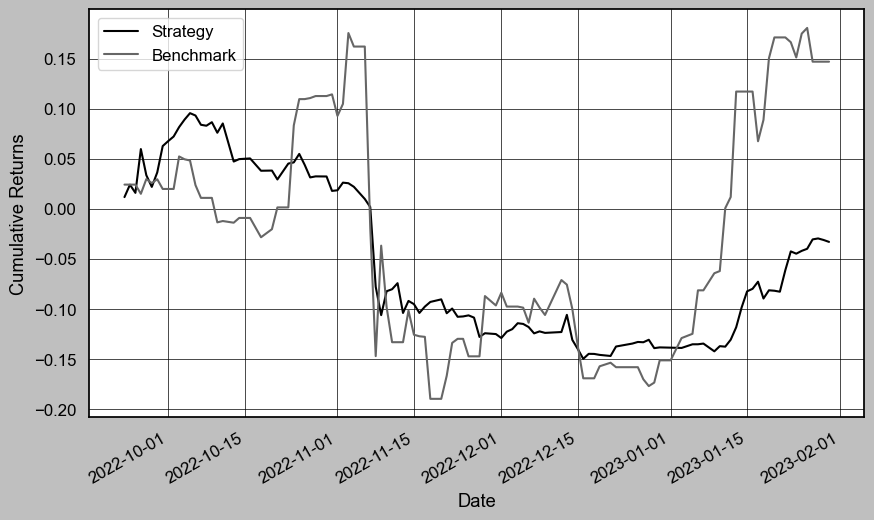

In [26]:
plt.style.use("grayscale")

plot = df[["portf_pctchg_accum", "benchm_pctchg_accum"]] \
            .rename(columns={"portf_pctchg_accum": "Strategy",
                            "benchm_pctchg_accum": "Benchmark"}) \
            .plot()

plt.xlabel("Date")
plt.ylabel("Cumulative Returns")

fig = plot.get_figure()
fig.savefig("/Users/guilhermepalazzo/Desktop/fig_xgboost_portf_vs_benchmk_rets.png")

## LSTM

### Portfolio overall metrics - Part 1

In [27]:
df_portf_metr = catalog.load("lstm_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "lstm"

df_benchm_metr = catalog.load("benchmark_lstm_metrics")
df_benchm_metr.loc[:, "model"] = "benchmark"

2023-03-15 15:59:23,632 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_metrics` (ParquetDataSet)...
2023-03-15 15:59:23,648 - kedro.io.data_catalog - INFO - Loading data from `benchmark_lstm_metrics` (ParquetDataSet)...


In [28]:
final_df = pd.concat([df_portf_metr, df_benchm_metr])
final_df = final_df.sort_values(by="nominal_profit", ascending=False)

final_df

,nominal_profit,consecutive_wins,consecutive_losses,model
0,13224.030000,1,0,benchmark
0,293.271468,1,1,lstm


### Portfolio overall metrics - Part 2

In [29]:
# benchmark
df_benchmark_pnl = catalog.load("benchmark_lstm_pnl")

df_benchmark_pnl.loc[:, "logret_pos"] = np.log(1 + df_benchmark_pnl["pctchg_pos"])
df_benchmark_pnl = df_benchmark_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_benchmark_pnl.loc[:, "logret_accum"] = df_benchmark_pnl["logret_pos"].cumsum()
df_benchmark_pnl.loc[:, "pctchg_accum"] = np.exp(df_benchmark_pnl["logret_accum"]) - 1

df_benchmark_pnl = df_benchmark_pnl[["pctchg_pos", "pctchg_accum"]].rename(columns={"pctchg_pos": "benchm_pctchg_pos",
                                                                           "pctchg_accum": "benchm_pctchg_accum"})

df_benchmark_pnl.index = pd.to_datetime(df_benchmark_pnl.index)

2023-03-15 15:59:23,834 - kedro.io.data_catalog - INFO - Loading data from `benchmark_lstm_pnl` (ParquetDataSet)...


In [30]:
# xgboost
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "logret_pos"]]
df_logret.loc[:, "date"] = df_logret["close_time"].dt.date

df_logret_daily = df_logret.groupby("date")["logret_pos"].sum().reset_index().set_index("date").sort_index()

df_logret_daily.loc[:, "portf_logret_accum"] = df_logret_daily["logret_pos"].cumsum()

df_logret_daily.loc[:, "portf_pctchg_accum"] = np.exp(df_logret_daily["portf_logret_accum"]) - 1
df_logret_daily.loc[:, "portf_pctchg_pos"] = np.exp(df_logret_daily["logret_pos"]) - 1

df_pctchg_daily = df_logret_daily[["portf_pctchg_pos", "portf_pctchg_accum"]]

df_pctchg_daily.index = pd.to_datetime(df_pctchg_daily.index)

2023-03-15 15:59:23,989 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [31]:
# comparison
df_pctchg_daily_portf = pd.DataFrame(df_pctchg_daily, index=df_pctchg_daily.index)
df_pctchg_daily_benchm = pd.DataFrame(df_benchmark_pnl, index=df_benchmark_pnl.index)

df = df_pctchg_daily_portf.merge(df_pctchg_daily_benchm, left_index=True, right_index=True, how="left")

df.loc[:, "benchm_pctchg_pos"] = df["benchm_pctchg_pos"].fillna(0)
df.loc[:, "benchm_pctchg_accum"] = df["benchm_pctchg_accum"].ffill()
df.head(10)

,portf_pctchg_pos,portf_pctchg_accum,benchm_pctchg_pos,benchm_pctchg_accum
date,,,,
2022-11-08,-0.010119,-0.010119,0.088249,0.088249
2023-01-18,0.012197,0.001955,0.000000,0.088249


In [32]:
qs.reports.metrics(df["portf_pctchg_pos"], df["benchm_pctchg_pos"], grayscale=True, periods_per_year=360)

                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2022-11-08  2022-11-08
End Period          2023-01-18  2023-01-18
Risk-Free Rate      0.0%        0.0%
Time in Market      100.0%      50.0%

Cumulative Return   0.2%        8.82%
CAGR﹪              1.01%       54.46%

Sharpe              1.25        13.42
Prob. Sharpe Ratio  -           -
Sortino             2.76        -
Sortino/√2          1.95        -
Omega               1.21        1.21

Max Drawdown        %           %
Longest DD Days     -           -

Gain/Pain Ratio     0.21        -
Gain/Pain (1M)      0.21        -

Payoff Ratio        -           -
Profit Factor       1.21        -
Common Sense Ratio  1.48        -
CPC Index           -           -
Tail Ratio          1.23        19.0
Outlier Win Ratio   4.07        1.13
Outlier Loss Ratio  0.45        -

MTD                 1.22%       0.0%
3M                  0.2%        8.82%
6M                  0.2%        8.82%
Y

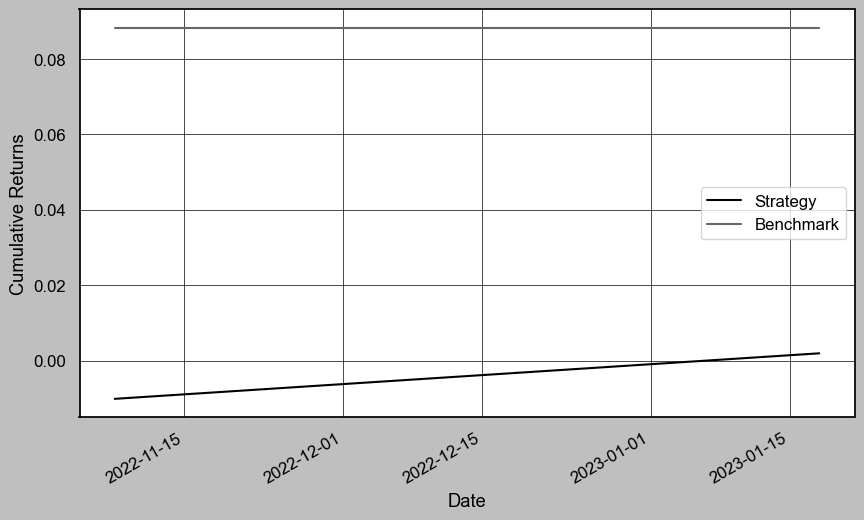

In [33]:
plt.style.use("grayscale")

plot = df[["portf_pctchg_accum", "benchm_pctchg_accum"]] \
            .rename(columns={"portf_pctchg_accum": "Strategy",
                            "benchm_pctchg_accum": "Benchmark"}) \
            .plot()

plt.xlabel("Date")
plt.ylabel("Cumulative Returns")

fig = plot.get_figure()
fig.savefig("/Users/guilhermepalazzo/Desktop/fig_lstm_portf_vs_benchmk_rets.png")

## LogReg

### Portfolio overall metrics - Part 1

In [34]:
df_portf_metr = catalog.load("logreg_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "LogReg"

df_benchm_metr = catalog.load("benchmark_logreg_metrics")
df_benchm_metr.loc[:, "model"] = "benchmark"

2023-03-15 15:59:27,492 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_metrics` (ParquetDataSet)...
2023-03-15 15:59:27,556 - kedro.io.data_catalog - INFO - Loading data from `benchmark_logreg_metrics` (ParquetDataSet)...


In [35]:
final_df = pd.concat([df_portf_metr, df_benchm_metr])
final_df = final_df.sort_values(by="nominal_profit", ascending=False)

final_df

,nominal_profit,consecutive_wins,consecutive_losses,model
0,21941.200000,11,5,benchmark
0,18418.748975,7,8,LogReg


### Portfolio overall metrics - Part 2

In [36]:
# benchmark
df_benchmark_pnl = catalog.load("benchmark_logreg_pnl")

df_benchmark_pnl.loc[:, "logret_pos"] = np.log(1 + df_benchmark_pnl["pctchg_pos"])
df_benchmark_pnl = df_benchmark_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_benchmark_pnl.loc[:, "logret_accum"] = df_benchmark_pnl["logret_pos"].cumsum()
df_benchmark_pnl.loc[:, "pctchg_accum"] = np.exp(df_benchmark_pnl["logret_accum"]) - 1

df_benchmark_pnl = df_benchmark_pnl[["pctchg_pos", "pctchg_accum"]].rename(columns={"pctchg_pos": "benchm_pctchg_pos",
                                                                           "pctchg_accum": "benchm_pctchg_accum"})

df_benchmark_pnl.index = pd.to_datetime(df_benchmark_pnl.index)

2023-03-15 15:59:27,691 - kedro.io.data_catalog - INFO - Loading data from `benchmark_logreg_pnl` (ParquetDataSet)...


In [37]:
# xgboost
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "logret_pos"]]
df_logret.loc[:, "date"] = df_logret["close_time"].dt.date

df_logret_daily = df_logret.groupby("date")["logret_pos"].sum().reset_index().set_index("date").sort_index()

df_logret_daily.loc[:, "portf_logret_accum"] = df_logret_daily["logret_pos"].cumsum()

df_logret_daily.loc[:, "portf_pctchg_accum"] = np.exp(df_logret_daily["portf_logret_accum"]) - 1
df_logret_daily.loc[:, "portf_pctchg_pos"] = np.exp(df_logret_daily["logret_pos"]) - 1

df_pctchg_daily = df_logret_daily[["portf_pctchg_pos", "portf_pctchg_accum"]]

df_pctchg_daily.index = pd.to_datetime(df_pctchg_daily.index)

2023-03-15 15:59:27,753 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [38]:
# comparison
df_pctchg_daily_portf = pd.DataFrame(df_pctchg_daily, index=df_pctchg_daily.index)
df_pctchg_daily_benchm = pd.DataFrame(df_benchmark_pnl, index=df_benchmark_pnl.index)

df = df_pctchg_daily_portf.merge(df_pctchg_daily_benchm, left_index=True, right_index=True, how="left")

df.loc[:, "benchm_pctchg_pos"] = df["benchm_pctchg_pos"].fillna(0)
df.loc[:, "benchm_pctchg_accum"] = df["benchm_pctchg_accum"].ffill()
df.head(10)

,portf_pctchg_pos,portf_pctchg_accum,benchm_pctchg_pos,benchm_pctchg_accum
date,,,,
2022-09-23,-0.009021,-0.009021,0.024135,-0.000508
2022-09-24,-0.003377,-0.012368,0.000000,-0.000508
2022-09-25,-0.009524,-0.021773,0.000000,-0.000508
2022-09-26,0.025121,0.002801,-0.008963,-0.009467
2022-09-27,-0.020168,-0.017424,0.014489,0.004886
2022-09-28,0.025710,0.007838,-0.003902,0.000965
2022-09-29,-0.009599,-0.001836,0.003755,0.004723
2022-09-30,-0.012560,-0.014373,-0.009422,-0.004743
2022-10-01,0.001767,-0.012631,0.000000,-0.004743


In [39]:
qs.reports.metrics(df["portf_pctchg_pos"], df["benchm_pctchg_pos"], grayscale=True, periods_per_year=360)

                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2022-09-23  2022-09-23
End Period          2023-01-30  2023-01-30
Risk-Free Rate      0.0%        0.0%
Time in Market      100.0%      66.0%

Cumulative Return   12.28%      17.49%
CAGR﹪              38.78%      57.78%

Sharpe              0.97        1.05
Prob. Sharpe Ratio  71.75%      73.12%
Sortino             1.42        1.5
Sortino/√2          1.01        1.06
Omega               1.17        1.17

Max Drawdown        -24.02%     -31.07%
Longest DD Days     75          87

Gain/Pain Ratio     0.17        0.24
Gain/Pain (1M)      0.65        1.0

Payoff Ratio        1.17        0.83
Profit Factor       1.17        1.24
Common Sense Ratio  1.61        1.55
CPC Index           0.73        0.53
Tail Ratio          1.38        1.25
Outlier Win Ratio   5.6         6.31
Outlier Loss Ratio  6.15        3.83

MTD                 35.21%      38.44%
3M                  5.95%       5.6%
6

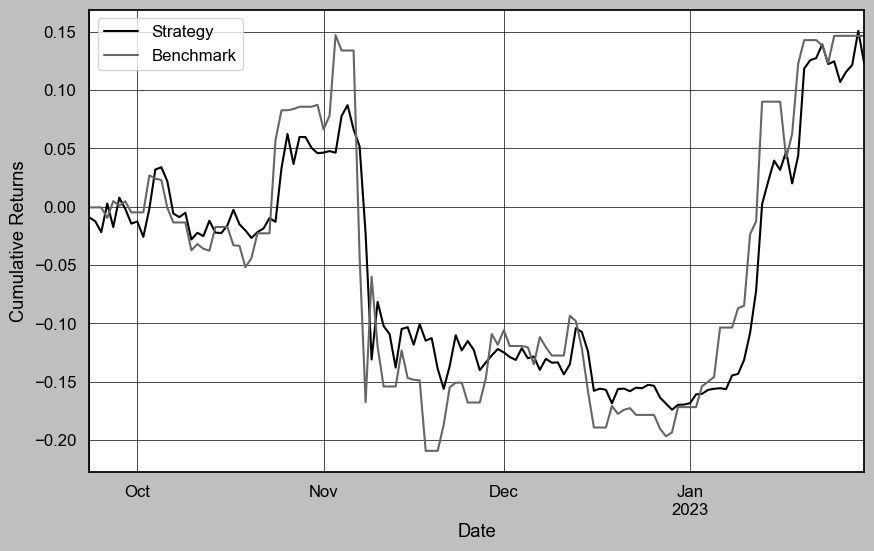

In [40]:
plt.style.use("grayscale")

plot = df[["portf_pctchg_accum", "benchm_pctchg_accum"]] \
            .rename(columns={"portf_pctchg_accum": "Strategy",
                            "benchm_pctchg_accum": "Benchmark"}) \
            .plot()

plt.xlabel("Date")
plt.ylabel("Cumulative Returns")

fig = plot.get_figure()
fig.savefig("/Users/guilhermepalazzo/Desktop/fig_logreg_portf_vs_benchmk_rets.png")